## Yolo standard

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.5 MB/s eta 0:00:00


In [11]:
!pip install -U ultralytics easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 31.3 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import easyocr
import re
import cv2
from google.colab.patches import cv2_imshow
from collections import defaultdict
import numpy as np

OJO: modificar los paths de modo que cumplan con tu organización de los datos.

In [2]:
YOLO_basic = YOLO('yolov8n.pt')

In [3]:
YOLO_basic.predict(source="data/razas-de-gatos.jpg", show=True, save=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/data/razas-de-gatos.jpg: 320x640 5 cats, 47.7ms
Speed: 1.6ms preprocess, 47.7ms inference, 83.2ms postprocess per image at shape (1, 3, 320, 640)
Results saved to /content/runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p


image 1/1 /content/data/razas-de-gatos.jpg: 320x640 5 cats, 8.8ms
Speed: 2.5ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 640)


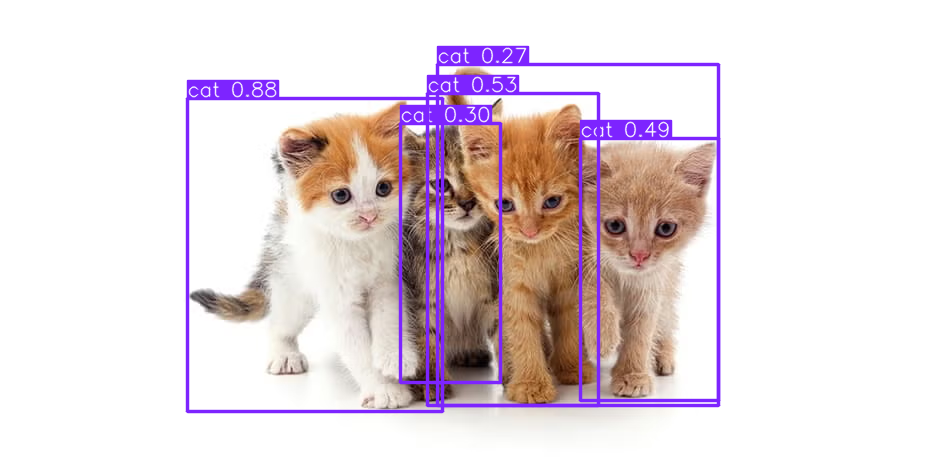

In [4]:
results = YOLO_basic("data/razas-de-gatos.jpg")

result = results[0]
result.show()

## Fine-tuning

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
YAML_DIR = "/content/drive/MyDrive/Colab Notebooks/Interciclo_IA_2025-B/vision_data/License-Plate-Data/data.yaml"

In [7]:
results = YOLO_basic.train(data=YAML_DIR, epochs=100, imgsz=640)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Colab Notebooks/Interciclo_IA_2025-B/vision_data/License-Plate-Data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=a

In [21]:
model_path = "runs/detect/train/weights/best.pt"
source_path = "data/prueba.jpg"

In [19]:
model  = YOLO(model_path)
reader = easyocr.Reader(["en"], gpu = False)

In [18]:
def detectar_placa(image_path, yolo_model, ocr_reader):
  detected_plates = []
  frame = cv2.imread(image_path)

  if frame is None:
    print(f"No se pudo cargar la imagen. Desde la ruta {image_path}")
    return None, []

  results = yolo_model(frame, verbose = False)
  result = results[0]
  boxes  = result.boxes.xyxy.cpu().numpy()

  if len(boxes) == 0:
    print("No se detectaron placas en la imagen.")
  else:
    for i, box in enumerate(boxes):
      x1, y1, x2, y2 = map(int, box)
      cropped_image = frame[y1:y2, x1:x2]


      plate_text_list = ocr_reader.readtext(cropped_image, detail=0, paragraph=True)

      if plate_text_list:
        raw_text = "".join(plate_text_list).upper().replace(" ", "")
        plate_text = raw_text

        print(f"Placa {i+1} Detectada: {plate_text}")
        detected_plates.append(plate_text)

        cv2.rectangle(frame, (x1, y1), (x2,y2), (0, 255, 0), 2)
        cv2.putText(frame, plate_text, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
      else:
        print(f"No se pudo leer el texto de la placa {i+1}.")

  return frame, detected_plates

Placa 1 Detectada: ECUNOOAGOK.0166
Placa 2 Detectada: GOK-166

Placas detectadas: ['ECUNOOAGOK.0166', 'GOK-166']


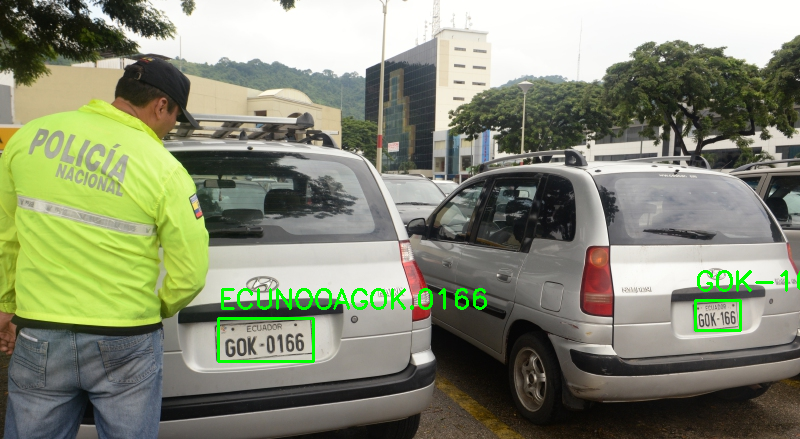

In [25]:
processed_frame, plates_list = detectar_placa(source_path, model, reader)

if processed_frame is not None:
  print(f"\nPlacas detectadas: {plates_list}")
  cv2_imshow(processed_frame)

In [16]:
def detectar_placa_ECU(image_path, yolo_model, ocr_reader):

    detected_plates = []
    frame = cv2.imread(image_path)

    if frame is None:
        print(f"Error: No se pudo cargar la imagen desde la ruta: {image_path}")
        return None, []

    results = yolo_model(frame, verbose=False)
    result = results[0]
    boxes = result.boxes.xyxy.cpu().numpy()

    if len(boxes) == 0:
        print("No se detectaron placas en la imagen.")
    else:
        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = map(int, box)
            plate_img = frame[y1:y2, x1:x2]
            plate_text_list = ocr_reader.readtext(plate_img, detail=0, paragraph=True)

            if plate_text_list:
                raw_text = "".join(plate_text_list).upper().replace(" ", "")

                # --- INICIO DE LA LÓGICA DE FORMATO PARA ECUADOR ---

                cleaned_text = re.sub(r'[^A-Z0-9]', '', raw_text.replace('ECUADOR', ''))

                car_match = re.search(r'([A-Z]{3})(\d{3})', cleaned_text)

                plate_text = None # Inicializar la variable

                if car_match:
                    plate_text = f"{car_match.group(1)}-{car_match.group(2)}"
                    detected_plates.append(plate_text)
                    print(f"Placa {i+1} Formateada (Coche): {plate_text}")
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(frame, plate_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                else:
                    print(f"Placa {i+1} Detectada, pero no cumple el formato de coche ni moto (Texto crudo: {cleaned_text})")
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 255), 2)

            else:
                print(f"Placa {i+1} Detectada, pero no se pudo leer el texto.")
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)

    return frame, detected_plates

Placa 1 Formateada (Coche): GOK-016
Placa 2 Formateada (Coche): GOK-166

Placas detectadas: ['GOK-016', 'GOK-166']


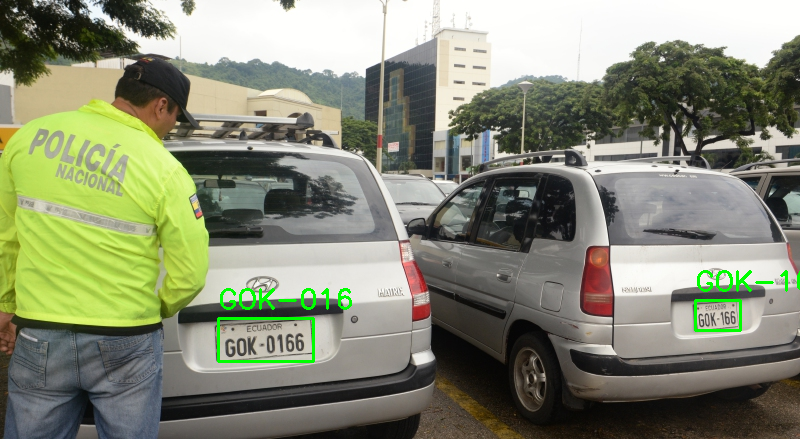

In [22]:
processed_frame, plates_list = detectar_placa_ECU(source_path, model, reader)

if processed_frame is not None:
  print(f"\nPlacas detectadas: {plates_list}")
  cv2_imshow(processed_frame)

## Vehicle counter

In [14]:
# --- CONFIGURACIÓN ---
model = YOLO('yolov8n.pt')

source_video_path = "data/cars_moving.mp4"
cap = cv2.VideoCapture(source_video_path)

if not cap.isOpened():
    print(f"Error: No se pudo abrir el video desde la ruta: {source_video_path}")
    exit()

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

out = cv2.VideoWriter(
    'video_salida.mp4',
    cv2.VideoWriter_fourcc(*'mp4v'),
    fps,
    (frame_width, frame_height)
)

# --- LÓGICA DE CONTEO ---
counting_line_y = int(frame_height * 0.7)
line_start = (0, counting_line_y)
line_end = (frame_width, counting_line_y)
line_color = (0, 255, 0)

track_history = defaultdict(list)
counted_vehicles_ids = set()
vehicle_counter = 0
vehicle_classes = [2, 3, 5, 7]  # car, motorcycle, bus, truck

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    results = model.track(frame, persist=True, classes=vehicle_classes, verbose=False)

    try:
        boxes = results[0].boxes.xywh.cpu()
        track_ids = results[0].boxes.id.int().cpu().tolist()
    except AttributeError:
        track_ids = []

    cv2.line(frame, line_start, line_end, line_color, 2)

    for box, track_id in zip(boxes, track_ids):
        x, y, w, h = box
        center_x = int(x)
        center_y = int(y)

        track = track_history[track_id]
        track.append((center_x, center_y))
        if len(track) > 30:
            track.pop(0)

        if len(track) > 1:
            y_prev = track[-2][1]
            y_curr = track[-1][1]
            if y_prev < counting_line_y <= y_curr and track_id not in counted_vehicles_ids:
                vehicle_counter += 1
                counted_vehicles_ids.add(track_id)
                line_color = (0, 255, 0)

        points = np.array(track, dtype=np.int32).reshape((-1, 1, 2))
        cv2.polylines(frame, [points], isClosed=False, color=(255, 0, 0), thickness=2)
        cv2.circle(frame, (center_x, center_y), 4, (0, 0, 255), -1)

    counter_text = f"Vehiculos: {vehicle_counter}"
    cv2.putText(frame, counter_text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    out.write(frame)

cap.release()
out.release()
print("Video procesado y guardado como 'video_salida.mp4'", vehicle_counter)


Video procesado y guardado como 'video_salida.mp4' 30
